#  **PROJECT - SPRINT 7**

#### **Step 2** Clean the DATA

***The file games.csv was imported and the data was cleaned to use in the others analyzes***\
**-** Clean column names and fix data types\
**-** Convert year_of_release to integer, handle missing values\
**-** Replace TBD in user_score with NaN because we need to read as a NaN to manage the Data\

In [289]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import numpy as np

# Load the data
data = pd.read_csv('games.csv')
data.columns = data.columns.str.lower()

# Clean column names and fix data types
# Convert year_of_release to integer, handle missing values
# Replace TBD in user_score with NaN

data['year_of_release'] = data['year_of_release'].dropna().astype(int)
data['user_score'] = pd.to_numeric(data['user_score'].replace("TBD", None), errors='coerce')



#### **Step 3** - Analyze DATA

***How many games were release by year?***\
**-** Was created a column in the df with total sales values\
**-** Calculate in the las 10 years the number of games released and was created a graphic\

**Conclusion:**\
The most relevant information about the releases are between year 2000 and 2016. After this analysis we are going to use the data from the year 2000 onwards.

Number of games released in the las 10 years is:
year_of_release
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64


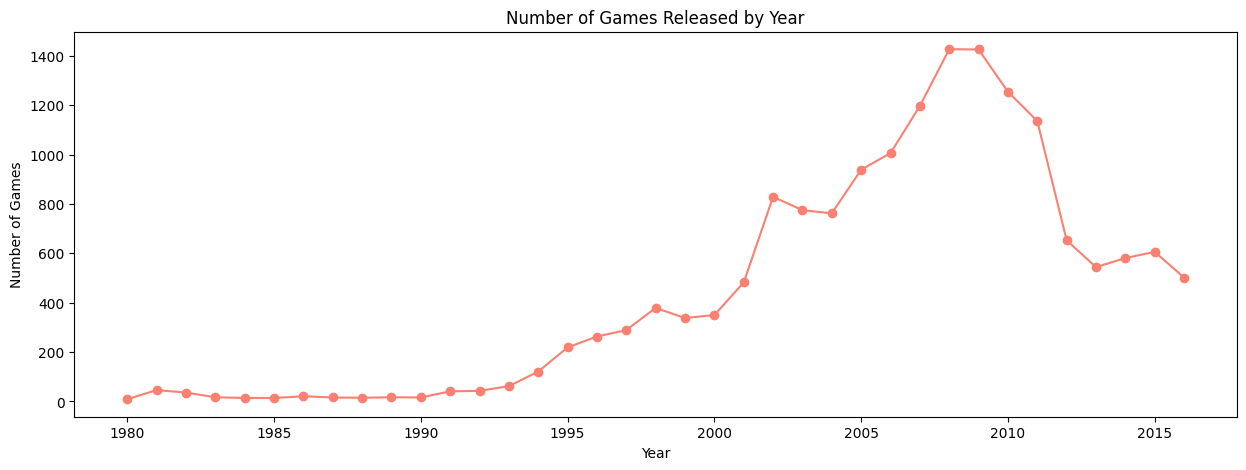

In [290]:
# Add total_sales column
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Games released by year
release_counts = data['year_of_release'].value_counts().sort_index()
#display(release_counts)

print('Number of games released in the las 10 years is:')
print(release_counts.tail(10))

plt.figure(figsize=(15, 5))
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color='salmon')
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')

plt.show()

***Top 10 Sales platforms and average time for platforms***\
**-** Using the function groupby was created a Dataframe to analyze the Top platforms by total sales\
**-** Was created a Bar graphic with the 10 most important platforms by sales\
**-** After create a filter to identify the 10 most important platforms, was created 2 more filter to calculate the popularity over time\
**-** One filter is popular_platforms and the other one is year_range, with those filter can we calculated the minimum and maximum release years, this information is in the graphic sales trends of top platforms over time\

**Conclusion**\
**-** The platform with the highest total sales is PS2, with $1.255,77 millions\
**-** The total sales difference between PS2 and X360 (Second platform in the Top 10) is around 23%\
**-** The last 4 platforms in the top 10 are less than 50% of the total sales of the platform located in position 6 (PS)\
**-** The average life time of the platform is 7.61 years\
**-** The graphic shows how all platforms increase and decrease the total sales over time

Top 10 plataforms by total sales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


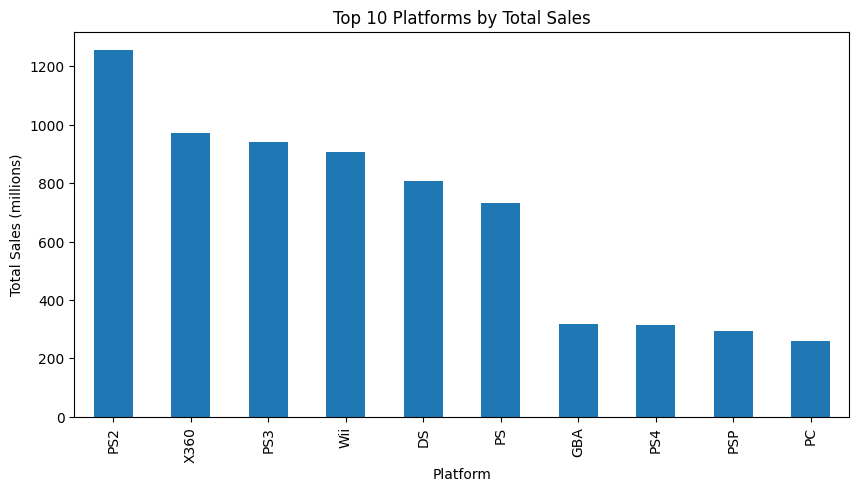

El tiempo promedio de vida de las plataformas es de:
7.61  años


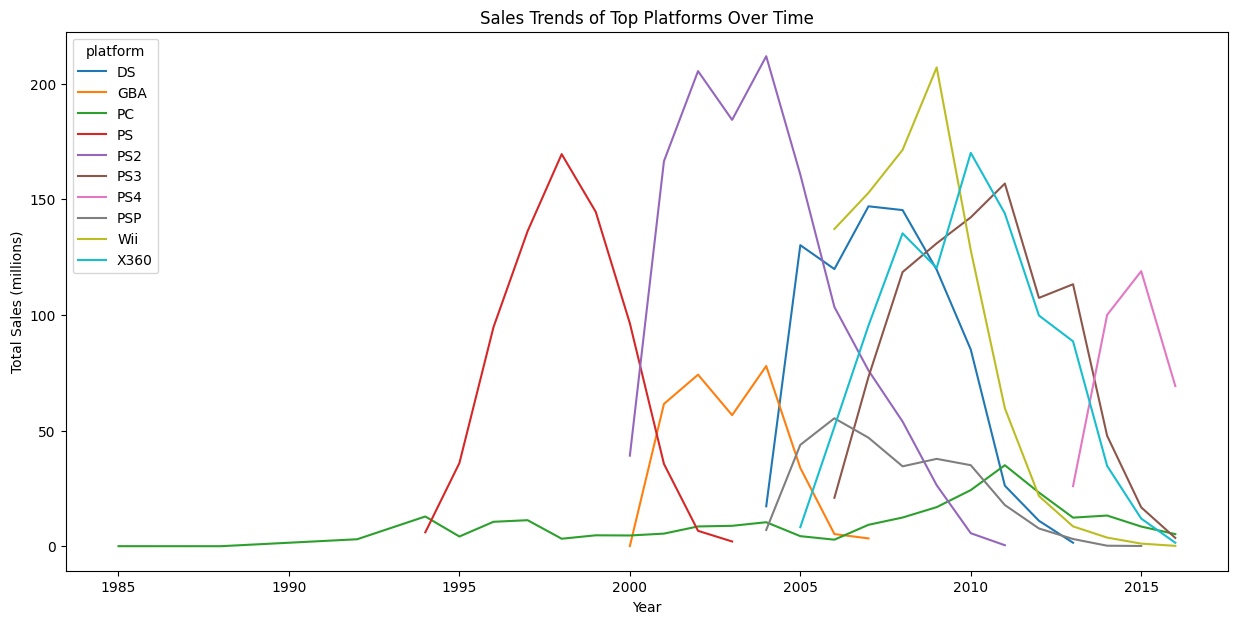

In [291]:
# Sales by platform
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10)

print('Top 10 plataforms by total sales:')
print(top_platforms)

plt.figure(figsize=(10, 5))
top_platforms.plot(kind='bar')
plt.title('Top 10 Platforms by Total Sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

# Platforms popularity over time
popular_platforms = data[data['platform'].isin(top_platforms.index)]
platform_year_sales = popular_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

platform_year_range = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_year_range['life'] = platform_year_range['max'] - platform_year_range['min']

print('El tiempo promedio de vida de las plataformas es de:')
print(platform_year_range['life'].mean().round(2),' años')

platform_year_sales.plot(figsize=(15, 7))
plt.title('Sales Trends of Top Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.show()

***Model for 2017***\
***Top 10 platforms in the last 5 years***\
**-** Was created a filter to use all information in the last 5 years, from year 2011\
**-** Was created a new dataframe that shows the total sales by platform in the las 5 years

**Conclusion**\
**-** The most important platforms are PS2, X360, PS3, Wii, DS, PS\
**-** Most significant total sales are represented in the top 6 platforms\
**-** Video games had an important moment after year 2000 

Top 10 plataforms by sales in the last 5 years:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64


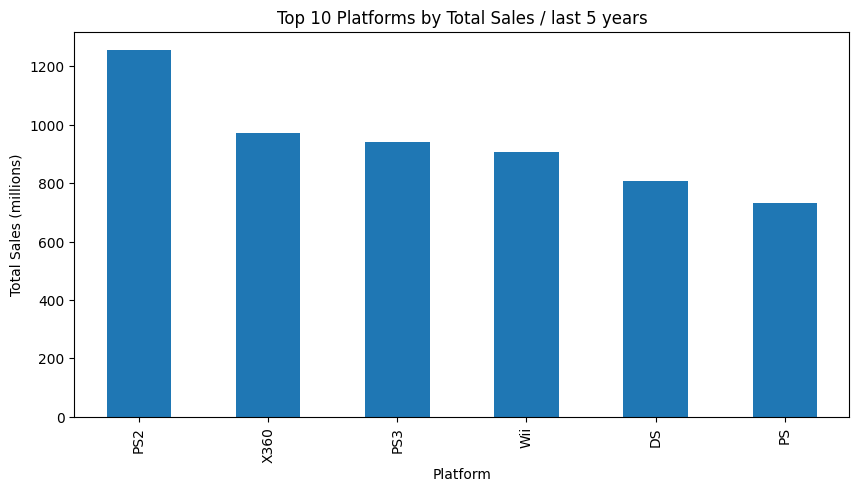

In [292]:
#DataFrame with last 5 years information
data_for_2017 = data[data['year_of_release'] >= 2011]
#data_for_2017

# Sales by platform
platform_sales_5 = data_for_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms_5 = platform_sales.head(6)

print('Top 10 plataforms by sales in the last 5 years:')
print(top_platforms_5)

plt.figure(figsize=(10, 5))
top_platforms_5.plot(kind='bar')
plt.title('Top 10 Platforms by Total Sales / last 5 years')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()


***Diagram box***\
**-** Was created a function to calculate Q1, Q3 and IQR

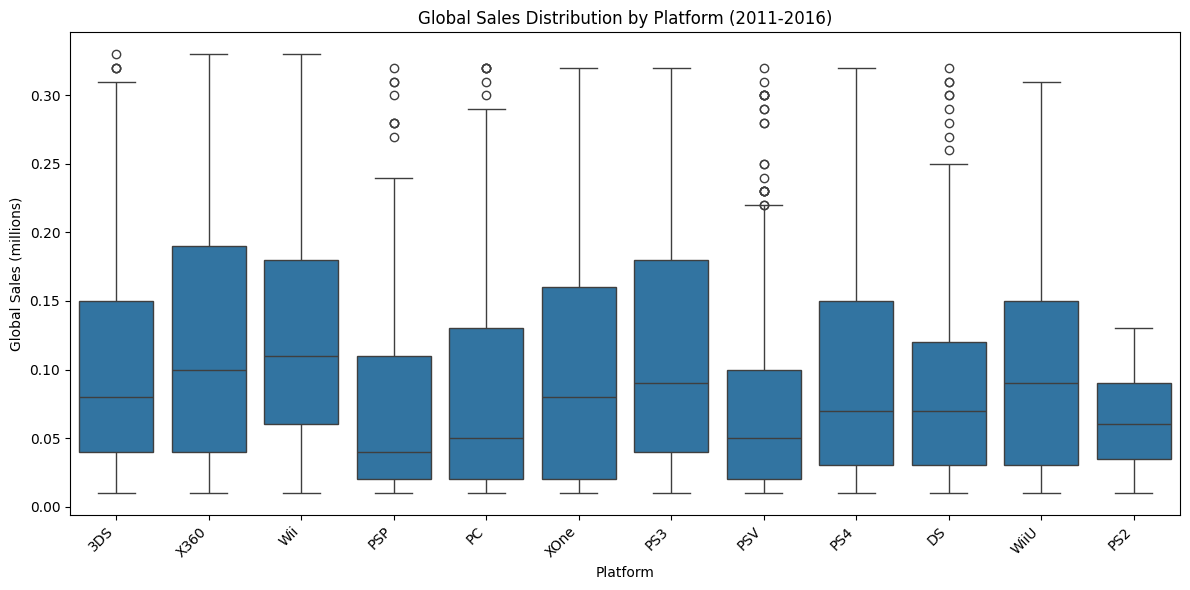

Total Median of 'total_sales': 0.07
Total Variance of 'total_sales': 0.006884447342860087


In [293]:
# Calculate Q1, Q3, and IQR for outlier removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'total_sales' for each platform
data_no_outliers = data_for_2017.copy()
for platform in data_for_2017['platform'].unique():
    data_no_outliers = remove_outliers(data_no_outliers, 'total_sales')


# Create the box plot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=data_no_outliers)
plt.title('Global Sales Distribution by Platform (2011-2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the total median and variance for 'total_sales'
total_median = data_no_outliers['total_sales'].median()
total_variance = data_no_outliers['total_sales'].var()

print(f"Total Median of 'total_sales': {total_median}")
print(f"Total Variance of 'total_sales': {total_variance}")

*Correlation between critic score and total sales Wii platform*

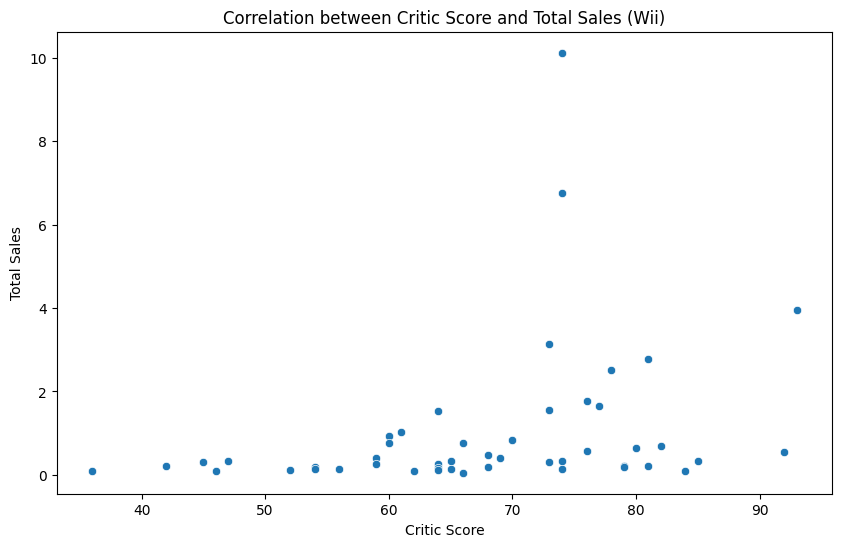

Pearson correlation coefficient: 0.29
P-value: 0.044


In [294]:
# Filter data for Wii platform
wii_data = data_for_2017[data_for_2017['platform'] == 'Wii']

# Drop rows with missing values in 'critic_score' and 'total_sales'
wii_data = wii_data.dropna(subset=['critic_score', 'total_sales'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=wii_data)  
plt.title('Correlation between Critic Score and Total Sales (Wii)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(wii_data['critic_score'], wii_data['total_sales'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

*Compare the same games in different platforms*

In [295]:
# Filter data for Call of Duty
call_of_duty_data = data_for_2017[data_for_2017['name'].str.contains('Call of Duty', case=False, na=False)]

# Group by platform and get total sales
sales_by_platform = call_of_duty_data.groupby('platform')['total_sales'].sum()

# Display the total sales for each platform
print(sales_by_platform)


# Example of comparing sales on two platforms (e.g., PS3 and X360)
if 'PS3' in sales_by_platform and 'X360' in sales_by_platform:
    ps3_sales = sales_by_platform['PS3']
    x360_sales = sales_by_platform['X360']
    print(f"\nTotal Sales for Call of Duty on PS3: {ps3_sales}")
    print(f"Total Sales for Call of Duty on X360: {x360_sales}")

elif 'PS3' in sales_by_platform:
    print("\nCall of Duty data not available for X360 in this dataset")
elif 'X360' in sales_by_platform:
    print("\nCall of Duty data not available for PS3 in this dataset")
else:
    print("\nCall of Duty data not available for PS3 or X360 in this dataset")

platform
DS       0.25
PC       4.72
PS3     42.55
PS4     30.59
PSV      1.47
Wii      0.83
WiiU     0.76
X360    44.67
XOne    17.99
Name: total_sales, dtype: float64

Total Sales for Call of Duty on PS3: 42.55
Total Sales for Call of Duty on X360: 44.67


*General distribution of the games per Genre*

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64


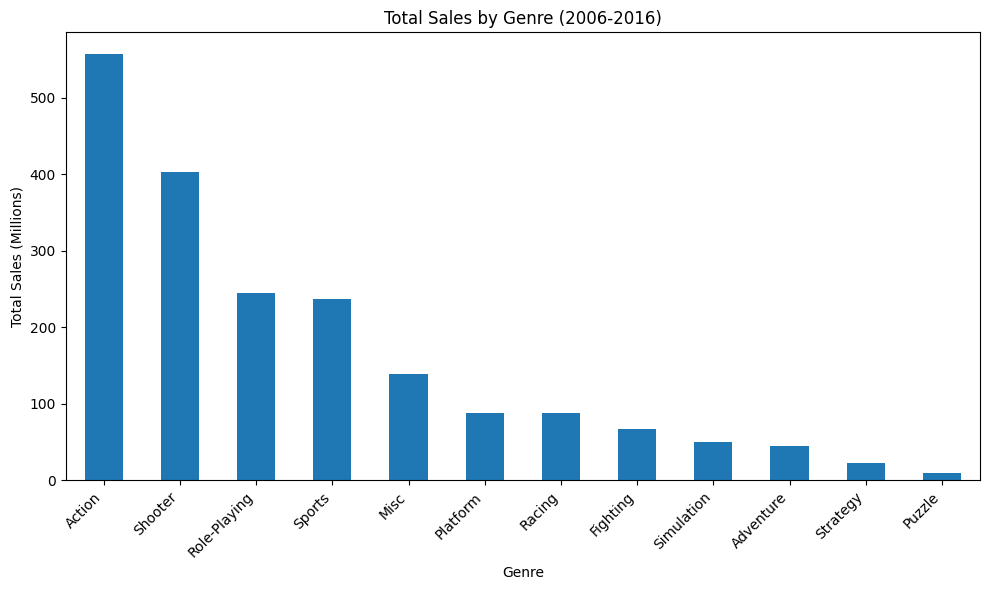

In [296]:
# Group data_for_2017 by genre and calculate total_price (assuming total_sales represents price)
genre_sales = data_for_2017.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the result
print(genre_sales)

# Create a bar plot for better visualization
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre (2006-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Step 4** Create user profile per region 

In [297]:
#Las cinco plataformas principales en NA
top_5_na_platforms = data_for_2017.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_na_platforms)

top_5_eu_platforms = data_for_2017.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_eu_platforms)

top_5_jp_platforms = data_for_2017.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_jp_platforms)

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


In [298]:
top_5_na_genres=data_for_2017.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_na_genres)

top_5_eu_genres=data_for_2017.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_eu_genres)

top_5_jp_genres=data_for_2017.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_jp_genres)

genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


#### **Step 5** Hypothesis test

In [299]:
# Separate user scores for Xbox One and PC
xbox_one_scores = data_for_2017[data_for_2017['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data_for_2017[data_for_2017['platform'] == 'PC']['user_score'].dropna()

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("The null hypothesis is rejected. There is a statistically significant difference between the average user ratings for Xbox One and PC games.")
else:
    print("The null hypothesis is not rejected. There is no statistically significant difference between the average user ratings for Xbox One and PC games.")

T-statistic: 0.48660071309601444
P-value: 0.6267602271422398
The null hypothesis is not rejected. There is no statistically significant difference between the average user ratings for Xbox One and PC games.


In [300]:
# Filter data for Action and Sports genres
action_scores = data_for_2017[data_for_2017['genre'] == 'Action']['user_score'].dropna()
sports_scores = data_for_2017[data_for_2017['genre'] == 'Sports']['user_score'].dropna()

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(action_scores, sports_scores)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("The null hypothesis is rejected. There is a statistically significant difference between the average user ratings for Action and Sports games.")
else:
    print("The null hypothesis is not rejected. There is no statistically significant difference between the average user ratings for Action and Sports games.")

T-statistic: 10.399926387716395
P-value: 5.1974550252152054e-24
The null hypothesis is rejected. There is a statistically significant difference between the average user ratings for Action and Sports games.
